# Image Classification with Convolutional Neural Networks (CNN)

### Florian POSCENTE Rayane NADAUD Bastien HENRY

## 1 Data understanding and preparation
--------------------

## <p style = "color:#FF6347;"> Task 1 : Load the CIFAR-10 Dataset <p>

**Question 1**


cifar10.load_data() permitted to loads the CIFAR-10 dataset, which consists of 60,000 color images of size 32x32 pixels. There are 50,000 training images and 10,000 test images, divided into 10 different classes (e.g., airplanes, cars, birds, etc.)

In [1]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


**Question 2**

train_images.shape gives the dimensions of the training dataset :  50,000 images, size 32x32 pixels,3 color channels and test_images.she gives similar dimensions for the test set, which typically contains 10,000 images.


In [2]:
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


**Question 3**

The first dimension ( [0] ) represents the number of images. , so [1] and [2] is the height and width of each image.

In [3]:
print(f'Number of training samples: {train_images.shape[0]}')
print(f'Number of test samples: {test_images.shape[0]}')


Number of training samples: 50000
Number of test samples: 10000


**Question 4**

.shape: This gives the shape of the first image, which in CIFAR-10 will be (32, 32, 3), representing:32 pixels in height.32 pixels in width.3 channels for the color information (RGB).


In [4]:
print(f'Each image shape: {train_images[0].shape}')


Each image shape: (32, 32, 3)


## <p style = "color:#FF6347;"> Task 2 : Visualize the Dataset <p>

**Question 1**

In [5]:
import matplotlib.pyplot as plt
import numpy as np

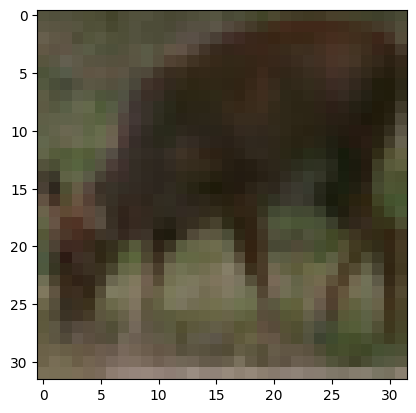

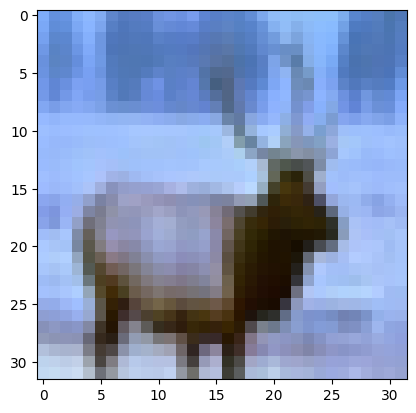

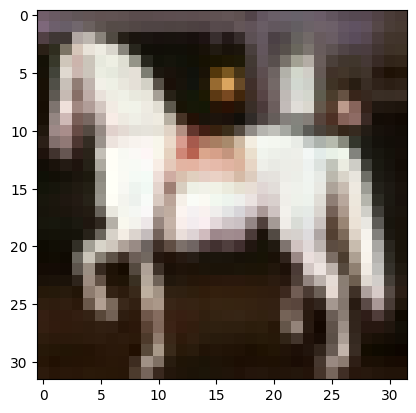

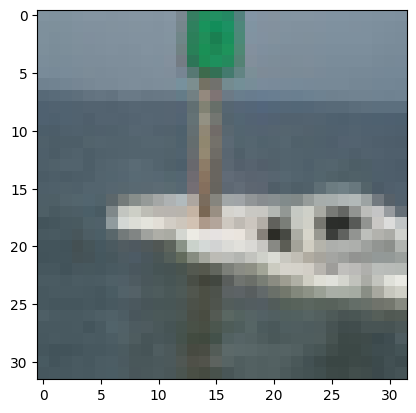

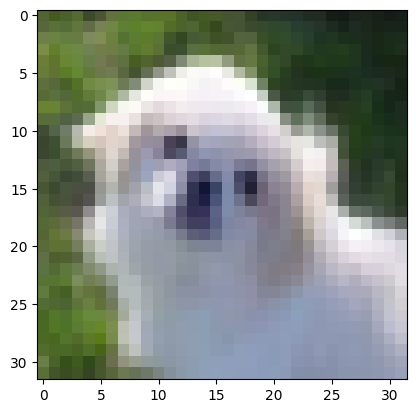

In [6]:
indices = np.random.randint(0, len(train_images), size=5)
for i in indices:
    plt.imshow(train_images[i])
    plt.show()

**Question 2**

In [7]:
print(f'Labels: {train_labels[indices]}')


Labels: [[4]
 [4]
 [7]
 [8]
 [5]]


**Question 3**

Images are really pixelized, a little bit difficult for human to analyze and classify it but it can be done whit a little effort. However a model well trained can do it whithout any problems

## <p style = "color:#FF6347;"> Task 3 : Normalize the Data <p>

In [8]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


Normalization speeds up convergence during training and stabilizes the learning process, as CNNs are sensitive to the scale of input data.

**question 3**

**question 4**

## <p style = "color:#FF6347;"> Task 4 : Apply One-Hot Encoding to the Labels <p>

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)


**question 2**

**question 3**

## <p style = "color:#FF6347;"> Task 5 : Explore the Class Distribution <p>

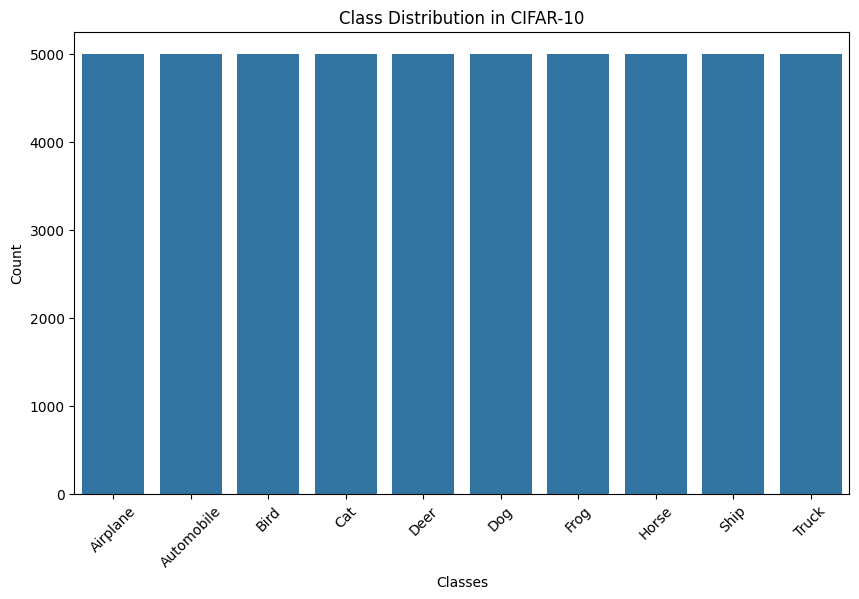

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


train_labels_flatten = train_labels.flatten()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels_flatten)

plt.title('Class Distribution in CIFAR-10')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.xticks(np.arange(10), class_names, rotation=45)

plt.show()


**question2**

**question 3**

##  2 Data Modeling
-------------------

### LeNet-5 Implementation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Creating the model

In [17]:
def create_lenet5():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    return model


In [18]:
lenet5 = create_lenet5()
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### VGG BLOCK FUNCTION

In [27]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [28]:
def vgg_block():
    block = Sequential()
    block.add(Conv2D(filters= 32,kernel_size= (3, 3), activation='relu', padding='same'))
    block.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', padding='same'))
    block.add(MaxPooling2D((2, 2)))
    return block

**VGG 1**

In [29]:
def create_vgg1():
    model = Sequential()
    model.add(vgg_block())  
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

Compile VGG1

In [30]:
vgg1 = create_vgg1()
vgg1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 2**

In [31]:
def create_vgg2():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    
    return model

Compile VGG2

In [32]:
vgg2 = create_vgg2()
vgg2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 3**

In [35]:
def create_vgg3():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


Compile VGG 3

In [36]:
vgg3 = create_vgg3()
vgg3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training Model

Training LeNet-5

In [19]:
history_lenet5 = lenet5.fit(train_images, train_labels_one_hot, epochs=10, validation_data=(test_images, test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3165 - loss: 1.8389 - val_accuracy: 0.4719 - val_loss: 1.4481
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4856 - loss: 1.4196 - val_accuracy: 0.4780 - val_loss: 1.4273
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5355 - loss: 1.2940 - val_accuracy: 0.5559 - val_loss: 1.2552
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5816 - loss: 1.1819 - val_accuracy: 0.5636 - val_loss: 1.2457
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6086 - loss: 1.1010 - val_accuracy: 0.5891 - val_loss: 1.1707
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6332 - loss: 1.0450 - val_accuracy: 0.6068 - val_loss: 1.1262
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6428 - loss: 1.0024 - val_accuracy: 0.6106 - val_loss: 1.1189
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6591 - loss: 0.9576 - 

In [37]:
history_vgg1 = vgg1.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.4357 - loss: 1.5588 - val_accuracy: 0.6186 - val_loss: 1.0935
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6596 - loss: 0.9748 - val_accuracy: 0.6344 - val_loss: 1.0166
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7244 - loss: 0.7902 - val_accuracy: 0.6755 - val_loss: 0.9343
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7718 - loss: 0.6573 - val_accuracy: 0.6821 - val_loss: 0.9430
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8133 - loss: 0.5309 - val_accuracy: 0.6775 - val_loss: 1.0028
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8564 - loss: 0.4128 - val_accuracy: 0.6754 - val_loss: 1.1068
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8936 - loss: 0.3106 - val_accuracy: 0.6623 - val_loss: 1.2571
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9212 -

In [40]:
history_vgg2 = vgg2.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.3917 - loss: 1.6671 - val_accuracy: 0.5843 - val_loss: 1.1888
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6415 - loss: 1.0118 - val_accuracy: 0.6661 - val_loss: 0.9314
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7101 - loss: 0.8145 - val_accuracy: 0.6824 - val_loss: 0.9034
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7574 - loss: 0.6823 - val_accuracy: 0.7198 - val_loss: 0.7951
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7951 - loss: 0.5734 - val_accuracy: 0.7138 - val_loss: 0.8386
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8209 - loss: 0.4981 - val_accuracy: 0.7252 - val_loss: 0.8375
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8588 - loss: 0.4114 - val_accuracy: 0.7210 - val_loss: 0.8681
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8802 -

### Model Prediction

LeNet-5

In [25]:
import random

predictions_lenet5 = lenet5.predict(test_images)

predicted_classes_lenet5 = np.argmax(predictions_lenet5, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_lenet5[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: 3, Actual: 3
Predicted: 8, Actual: 8
Predicted: 3, Actual: 5
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8


In [26]:
test_loss_lenet5, test_accuracy_lenet5 = lenet5.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of LeNet5: {test_accuracy_lenet5}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6227 - loss: 1.1003
Test accuracy of LeNet5: 0.621399998664856


VGG1

In [38]:
predictions_VGG1 = vgg1.predict(test_images)

predicted_classes_VGG1 = np.argmax(predictions_VGG1, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG1[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted: 2, Actual: 2
Predicted: 9, Actual: 1
Predicted: 3, Actual: 7
Predicted: 4, Actual: 2
Predicted: 0, Actual: 8


In [39]:
test_loss_VGG1, test_accuracy_VGG1 = vgg1.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG1: {test_accuracy_VGG1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6737 - loss: 1.6904
Test accuracy of VGG1: 0.6686000227928162
